# Hierarchical Clustering
### Hierarchical Clustering is an unsupervised learning algorithm that builds a hierarchy of clusters by either merging or dividing data points based on their similarity, typically measured by distance metrics. It excels in segmenting mall customers (e.g., grouping shoppers based on annual income and spending score) into nested structures, requiring no prior specification of the number of clusters. The algorithm assumes that data points can be organized into a tree-like structure, which simplifies the process but may not hold for datasets with highly irregular shapes or noise. Its strength lies in its flexibility and ability to reveal hierarchical relationships, but it can be computationally intensive, especially with large datasets, and sensitive to the choice of linkage method.

### Use Hierarchical Clustering as an exploratory tool for unsupervised learning prototypes, with dendrogram analysis to determine cluster levels, particularly for deployment in detailed market segmentation or biological taxonomy systems.

| Aspect | Details |
| :- | :- |
| Use For           | Customer segmentation (e.g., mall shopper grouping, market analysis)<br>Can be extended to biological taxonomy or image segmentation |
| Key Assumptions   | - Data points can form a hierarchical structure<br>- Independent observations<br>- Sufficient data for meaningful dendrogram construction |
| Advantages        | - Flexible with no need to predefine cluster number<br>- Reveals nested relationships<br>- Effective for visualizing data hierarchy |
| Disadvantages     | - Computationally intensive for large datasets<br>- Sensitive to linkage method and distance metric<br>- Struggles with noisy or irregular data |
| Avoid When        | - Large datasets requiring low latency<br>- Highly noisy data with outliers<br>- Need for scalable clustering solutions |
| Real-World Use Case | Mall customer segmentation (e.g., nesting shoppers by income and spending behavior)<br>Biological taxonomy (e.g., classifying species into phylogenetic trees) |

## Problem Description: 
### Segment mall customers into hierarchical groups based on annual income and spending score to identify nested market segments. This is an unsupervised learning problem where Hierarchical Clustering builds a tree of clusters without requiring a predefined number of clusters.

Using Kaggle dataset https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import joblib
import os

In [13]:
project_dir = './10_hierarchical_clustering'

# load  dataset
data = pd.read_csv(project_dir + '/data/Mall_Customers.csv')
print("Dataset loaded, shape:", data.shape)

# select relevant features
features = ['Annual Income (k$)', 'Spending Score (1-100)']

X = data[features]
print("Features shape:", X.shape)

# scale features for better K-Means performance (needed because of distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset loaded, shape: (200, 5)
Features shape: (200, 2)


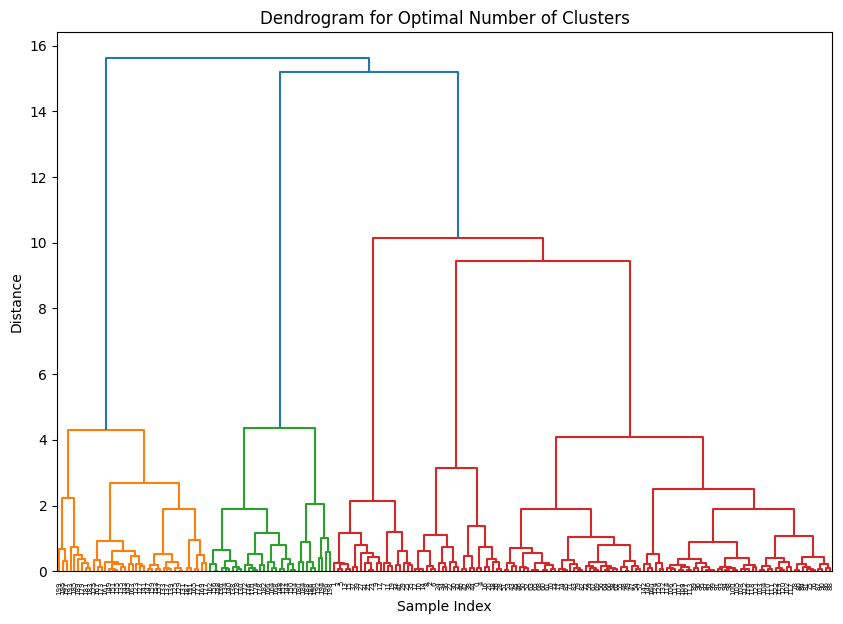

In [14]:
# determine the optimal number of clusters using a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Optimal Number of Clusters')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# train themodel (using Agglomerative Clustering with a threshold)
# optimal number of clusters (e.g., 5) can be estimated from the dendrogram
optimal_clusters = 5  # adjust based on dendrogram (e.g., where distances increase sharply)
hclust_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hclust_model.fit(X_scaled)  

# add cluster labels to the original data
data['Cluster'] = hclust_model.labels_

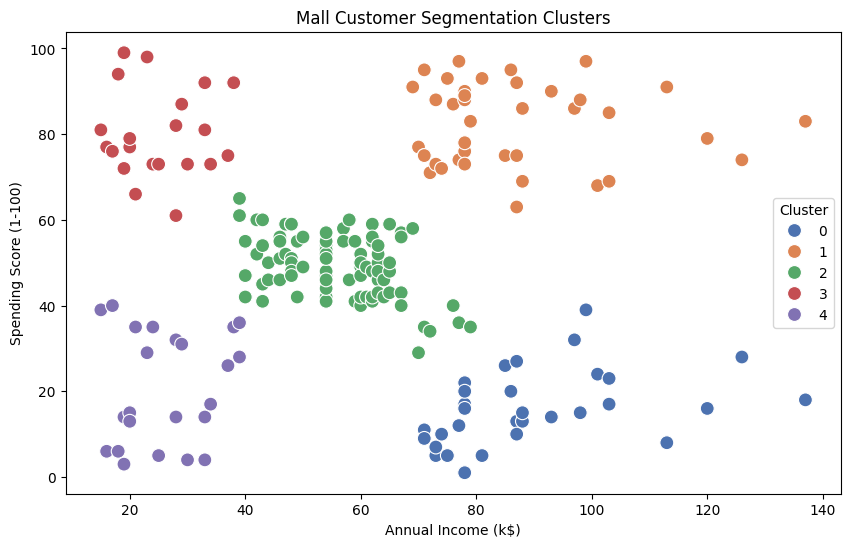

In [16]:
# visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation Clusters')
plt.legend(title='Cluster')
plt.show()

In [17]:
# save the trained model to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True)
model_filename = os.path.join(model_dir, 'mall_customer_hclust_model.pkl')
scaler_filename = os.path.join(model_dir, 'mall_customer_scaler.pkl')
joblib.dump(hclust_model, model_filename)
joblib.dump(scaler, scaler_filename)
print(f'Model saved as {model_filename}')
print(f'Scaler saved as {scaler_filename}')

Model saved as ./10_hierarchical_clustering/model/mall_customer_hclust_model.pkl
Scaler saved as ./10_hierarchical_clustering/model/mall_customer_scaler.pkl


In [18]:
# load the model and scaler, and run a prediction test
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
sample_data = pd.DataFrame(
    [[60, 40]],  # example values for annual income and spending score
    columns=features
)
sample_input_scaled = loaded_scaler.transform(sample_data)

# compute centroids of each cluster from the original scaled data
centroids = []
for cluster_label in range(optimal_clusters):
    cluster_points = X_scaled[hclust_model.labels_ == cluster_label]
    centroids.append(cluster_points.mean(axis=0))
centroids = np.vstack(centroids)

# assign the sample to the nearest centroid
from scipy.spatial.distance import cdist
distances = cdist(sample_input_scaled, centroids)
sample_cluster = np.argmin(distances, axis=1)
print(f'Predicted Cluster for sample input: {sample_cluster[0]}')

Predicted Cluster for sample input: 2
